* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. 

* Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.

* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('train.csv')
df_ = pd.read_csv('test.csv')
df.drop(columns='Name',inplace=True)
df_.drop(columns='Name',inplace=True)

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [4]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [5]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [6]:
len(df)

8693

In [7]:
df.isna().sum().max()/len(df)*100

2.4962613597147127

In [8]:
df.dropna(inplace=True)
df=df.reset_index()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         6764 non-null   int64  
 1   PassengerId   6764 non-null   object 
 2   HomePlanet    6764 non-null   object 
 3   CryoSleep     6764 non-null   object 
 4   Cabin         6764 non-null   object 
 5   Destination   6764 non-null   object 
 6   Age           6764 non-null   float64
 7   VIP           6764 non-null   object 
 8   RoomService   6764 non-null   float64
 9   FoodCourt     6764 non-null   float64
 10  ShoppingMall  6764 non-null   float64
 11  Spa           6764 non-null   float64
 12  VRDeck        6764 non-null   float64
 13  Transported   6764 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(6)
memory usage: 693.7+ KB


<AxesSubplot:ylabel='Transported'>

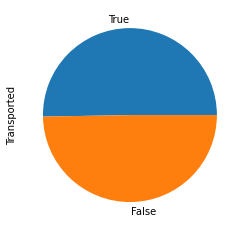

In [10]:
df['Transported'].value_counts().plot(kind='pie')

In [11]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
dtypes: float64(6), object(6)
memory usage: 401.1+ KB


In [12]:
len(df_)

4277

In [13]:
df_.isna().sum().max()/len(df_)*100

2.4783726911386488

In [14]:
df_.dropna(inplace=True)
df_=df.reset_index()

In [15]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       6764 non-null   int64  
 1   index         6764 non-null   int64  
 2   PassengerId   6764 non-null   object 
 3   HomePlanet    6764 non-null   object 
 4   CryoSleep     6764 non-null   object 
 5   Cabin         6764 non-null   object 
 6   Destination   6764 non-null   object 
 7   Age           6764 non-null   float64
 8   VIP           6764 non-null   object 
 9   RoomService   6764 non-null   float64
 10  FoodCourt     6764 non-null   float64
 11  ShoppingMall  6764 non-null   float64
 12  Spa           6764 non-null   float64
 13  VRDeck        6764 non-null   float64
 14  Transported   6764 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(6)
memory usage: 746.5+ KB


In [16]:
df[["Transported","CryoSleep",'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
    'Spa', 'VRDeck']] = df[["Transported","CryoSleep",'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].astype(int)
df[['HomePlanet', 'Cabin','Destination']] = df[['HomePlanet', 'Cabin','Destination']].astype(str)

df_[["CryoSleep",'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
    'Spa', 'VRDeck']] = df_[["CryoSleep",'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].astype(int)
df_[['HomePlanet', 'Cabin','Destination']] = df_[['HomePlanet', 'Cabin','Destination']].astype(str)

In [17]:
df['Cabin_'] = df['Cabin'].str.split('/')
split = pd.DataFrame(df['Cabin_'].to_list(), columns = ['deck', 'num', 'side'])
df_['Cabin_'] = df_['Cabin'].str.split('/')
split_ = pd.DataFrame(df_['Cabin_'].to_list(), columns = ['deck', 'num', 'side'])

In [18]:
df.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_
0,0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39,0,0,0,0,0,0,0,"[B, 0, P]"
1,1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24,0,109,9,25,549,44,1,"[F, 0, S]"
2,2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58,1,43,3576,0,6715,49,0,"[A, 0, S]"
3,3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33,0,0,1283,371,3329,193,0,"[A, 0, S]"
4,4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16,0,303,70,151,565,2,1,"[F, 1, S]"


In [19]:
df[split.columns]=split[split.columns]
df_[split_.columns]=split_[split_.columns]

df.drop(columns=['Cabin','Cabin_','index'],inplace=True)
df_.drop(columns=['Cabin','Cabin_','index'],inplace=True)

In [20]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0001_01,Europa,0,TRAPPIST-1e,39,0,0,0,0,0,0,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24,0,109,9,25,549,44,1,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58,1,43,3576,0,6715,49,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33,0,0,1283,371,3329,193,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16,0,303,70,151,565,2,1,F,1,S


In [21]:
df[['deck','side']]=df[['deck','side']].astype(str)
df['num']=df['num'].astype(int)
df_[['deck','side']]=df_[['deck','side']].astype(str)
df_['num']=df_['num'].astype(int)

In [22]:
encoded_df=pd.get_dummies(df[['HomePlanet','Destination','deck','side']])
encoded_df_=pd.get_dummies(df_[['HomePlanet','Destination','deck','side']])

In [23]:
df[encoded_df.columns]=encoded_df[encoded_df.columns]
df_[encoded_df_.columns]=encoded_df_[encoded_df_.columns]

In [24]:
df.drop(columns=['HomePlanet_Mars','Destination_TRAPPIST-1e','side_S','deck_T',
                'HomePlanet','Destination','side','deck'],inplace=True)
df_.drop(columns=['HomePlanet_Mars','Destination_TRAPPIST-1e','side_S','deck_T',
                 'HomePlanet','Destination','side','deck','level_0'],inplace=True)

In [25]:
df_.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'num',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'deck_A', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'side_P'],
      dtype='object')

In [26]:
df.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'num',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'deck_A', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'side_P'],
      dtype='object')

In [27]:
X_train=df.iloc[:,1:-1]
y_train=df.loc[:,df.columns=='Transported']
X_test=df_.iloc[:,1:-1]
y_test=df_.loc[:,df_.columns=='Transported']

In [28]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_leaf=5).fit(X_train, y_train)
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
            random_state = 100,max_depth=5, min_samples_leaf=5).fit(X_train, y_train)

In [29]:
ypred_gini = clf_gini.predict(X_test)
ypred_entropy = clf_entropy.predict(X_test)

In [34]:
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ","\n",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ","\n",
    classification_report(y_test, y_pred))

In [35]:
cal_accuracy(y_test,ypred_gini)

Confusion Matrix:  
 [[3363    0]
 [   0 3401]]
Accuracy :  100.0
Report :  
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      3363
        True       1.00      1.00      1.00      3401

    accuracy                           1.00      6764
   macro avg       1.00      1.00      1.00      6764
weighted avg       1.00      1.00      1.00      6764



In [36]:
cal_accuracy(y_test,ypred_entropy)

Confusion Matrix:  
 [[3363    0]
 [   0 3401]]
Accuracy :  100.0
Report :  
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      3363
        True       1.00      1.00      1.00      3401

    accuracy                           1.00      6764
   macro avg       1.00      1.00      1.00      6764
weighted avg       1.00      1.00      1.00      6764

